# Using Bayesian methods to fit HLMs with non-informative priors
Evan Edwards

In [1]:
%%capture --no-display
# Imports
import pandas as pd
import bambi as bmb
import arviz as az
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load dataset
PISA2018 = pd.read_csv("pisa2018.BayesBook.csv")

In [3]:
# Data processing: converting categorical values to numerical values
PISA2018['Female'] = PISA2018['Female'].replace({'Female': 1, 'Male': 0})

In [4]:
# Setting up the priors
priors = {
      'Female': bmb.Prior('Uniform', lower = min(PISA2018['Female']), upper = max(PISA2018['Female'])),
      'ESCS': bmb.Prior('Logistic', mu = PISA2018['ESCS'].mean())
}

In [5]:
%%capture --no-display
# The formula for the HLM
model_formula = 'PV1MATH ~ 1 + Female + ESCS + (1|SchoolID)'

# Initialize the model
model = bmb.Model(model_formula, data = PISA2018, priors = priors)

# Getting the fit model
trace = model.fit()

In [6]:
# Printing a summary of the fit model
print(az.summary(trace))

                         mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept             471.697   2.891  466.404  477.279      0.071    0.050   
ESCS                   25.366   1.302   22.847   27.692      0.018    0.013   
PV1MATH_sigma          79.126   0.814   77.636   80.700      0.010    0.007   
Female                  0.495   0.288    0.061    0.999      0.004    0.003   
1|SchoolID_sigma       32.376   2.259   28.305   36.621      0.070    0.050   
...                       ...     ...      ...      ...        ...      ...   
1|SchoolID[84000169]  -11.360  12.827  -35.641   12.646      0.172    0.180   
1|SchoolID[84000171]  -19.915  12.676  -44.126    3.243      0.158    0.137   
1|SchoolID[84000172]  -20.193  21.343  -61.712   18.615      0.281    0.266   
1|SchoolID[84000173]    6.786  14.051  -18.870   32.315      0.186    0.196   
1|SchoolID[84000175]   -0.906  13.149  -26.312   23.561      0.182    0.234   

                      ess_bulk  ess_tail  r_hat  
I

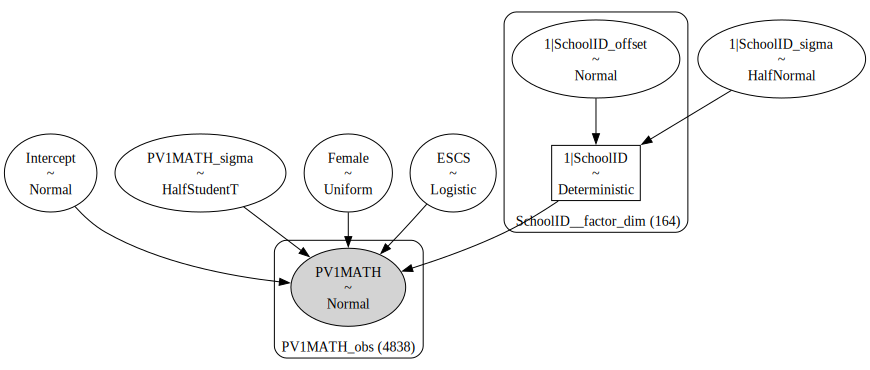

In [7]:
# Plotting a visualization of the model itself
model.graph()

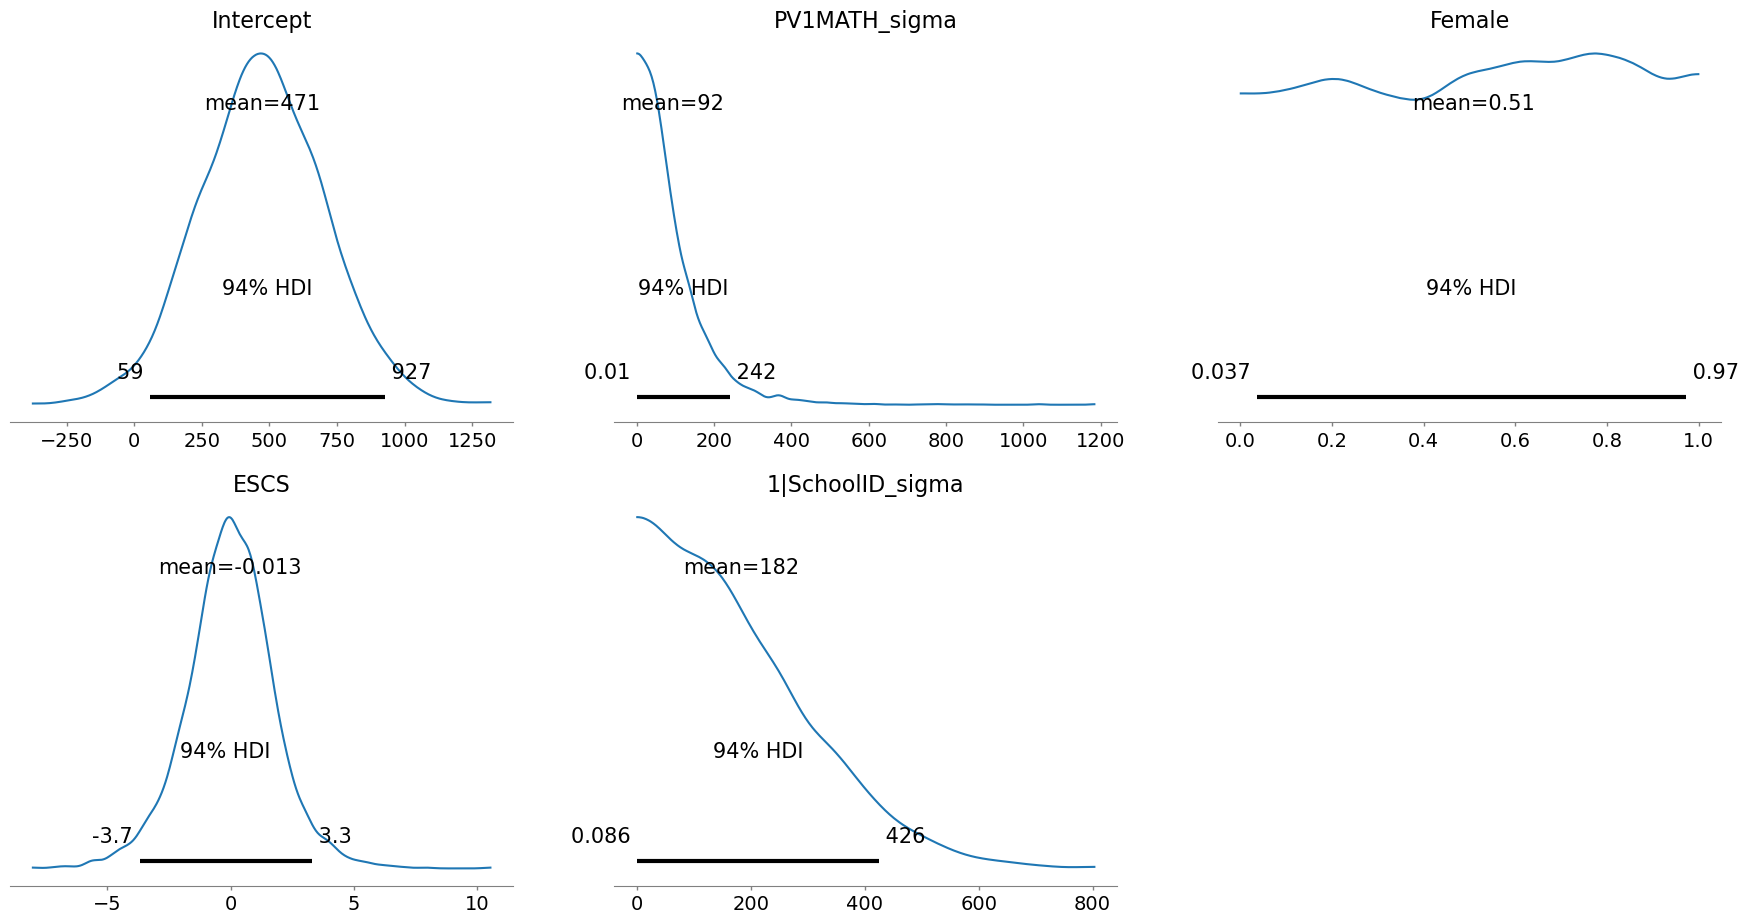

In [8]:
%%capture --no-display
# Plotting the priors used
model.plot_priors()
plt.show()

In [9]:
# Creating the PV1MATH predictions using the model, and calculating the R^2 score and MSE as metrics of accuracy

# Making predictions on the training data
pred = bmb.interpret.predictions(model,trace)['estimate']

# Printing the accuracy metrics
print(f'The R^2 score is: {r2_score(PISA2018["PV1MATH"], pred)}')
print(f'The MSE is: {mean_squared_error(PISA2018["PV1MATH"], pred)}')

The R^2 score is: 0.2760622860527585
The MSE is: 6086.085235415653


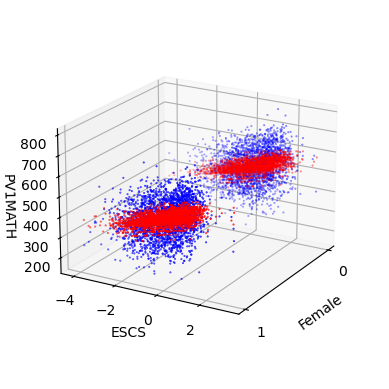

In [10]:
# Plotting the results in 3D, showing the predicted values in red
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=30)
ax.scatter3D(PISA2018["Female"], PISA2018["ESCS"], PISA2018["PV1MATH"], s=0.2, c="blue")
ax.scatter3D(PISA2018["Female"], PISA2018["ESCS"], pred, s=0.2, c="red")
ax.set_xlabel("Female")
ax.set_ylabel('ESCS')
ax.set_zlabel("PV1MATH")
ax.set_xticks([0, 1])
ax.set_box_aspect(None, zoom=0.85)
plt.show()